In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib

  Using cached matplotlib-3.6.3-cp311-cp311-win_amd64.whl (7.2 MB)
  Using cached contourpy-1.0.7-cp311-cp311-win_amd64.whl (162 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp311-cp311-win_amd64.whl (55 kB)
  Using cached Pillow-9.4.0-cp311-cp311-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
 %matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("Dados.xlsx")

In [4]:
 def mape(actual, pred):
   return np.mean(np.abs((actual - pred) / actual)) * 100

In [5]:
df = df[["Data", "Vendas"]]
df.columns = ["Data", "Vendas"]
df["date"] = pd.to_datetime(df.Data)
df.set_index(df.Data, inplace = True)
df.sort_index(ascending = True, inplace = True)
df.drop("Data", axis = 1, inplace = True)
df.head()

,Vendas,date
Data,,
2022-12-06,870,2022-12-06
2022-12-07,868,2022-12-07
2022-12-08,1189,2022-12-08
2022-12-09,742,2022-12-09
2022-12-10,317,2022-12-10


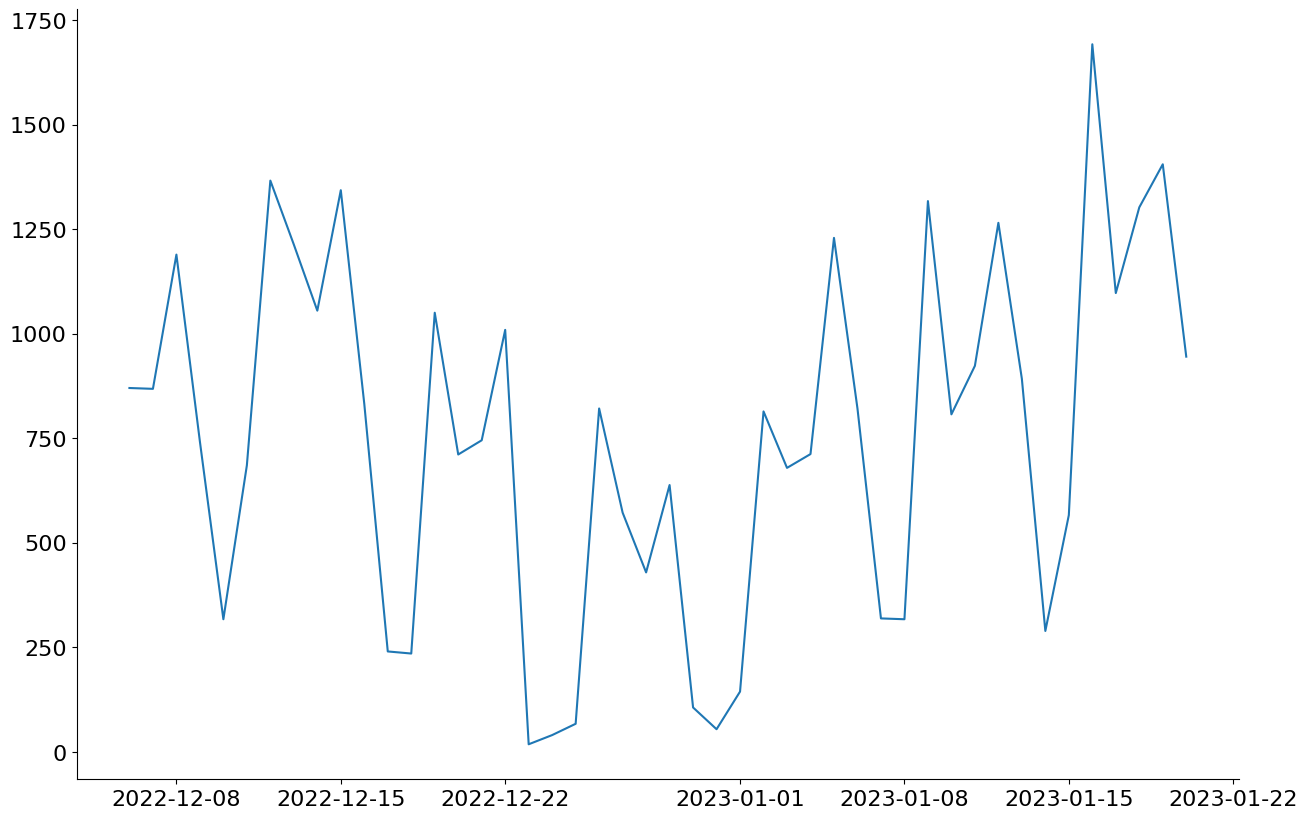

In [6]:
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(df.index, df.Vendas)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.show()

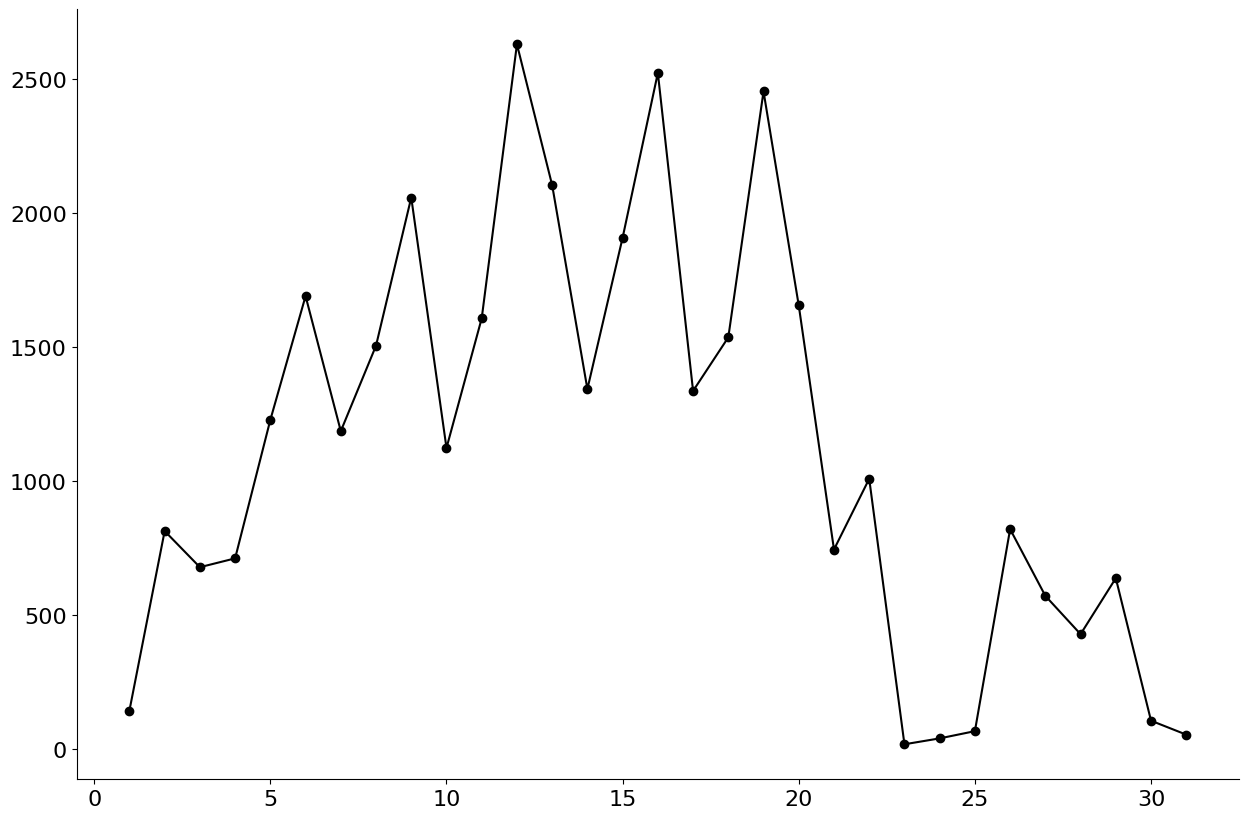

In [7]:
gr_dt = df.groupby(df.index.day).sum()
plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(gr_dt.index, gr_dt.Vendas, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
plt.show()

In [12]:
"""params = []
for x in range(0, 11):
    for y in range(0, 11):
        for z in range(0, 11):
            params.append((x, y, z))
best_param = None
best_acc = float("inf")
for param in params:
    try:
        model = ARIMA(df.Vendas, order = param).fit()
        acc = mape(df.Vendas, model.predict(typ = "levels"))
        if acc < best_acc:
            best_acc = acc
            best_param = param
        print("Order: ", param, "MAPE:", acc)
    except: 
        pass
print("Melhor order: ", best_param, " MAPE:", best_acc)"""

'params = []\nfor x in range(0, 11):\n    for y in range(0, 11):\n        for z in range(0, 11):\n            params.append((x, y, z))\nbest_param = None\nbest_acc = float("inf")\nfor param in params:\n    try:\n        model = ARIMA(df.Vendas, order = param).fit()\n        acc = mape(df.Vendas, model.predict(typ = "levels"))\n        if acc < best_acc:\n            best_acc = acc\n            best_param = param\n        print("Order: ", param, "MAPE:", acc)\n    except: \n        pass\nprint("Melhor order: ", best_param, " MAPE:", best_acc)'

In [9]:
model = ARIMA(df.Vendas, order = (7,1,6)).fit()
acc = mape(df.Vendas, model.predict(typ = "levels"))

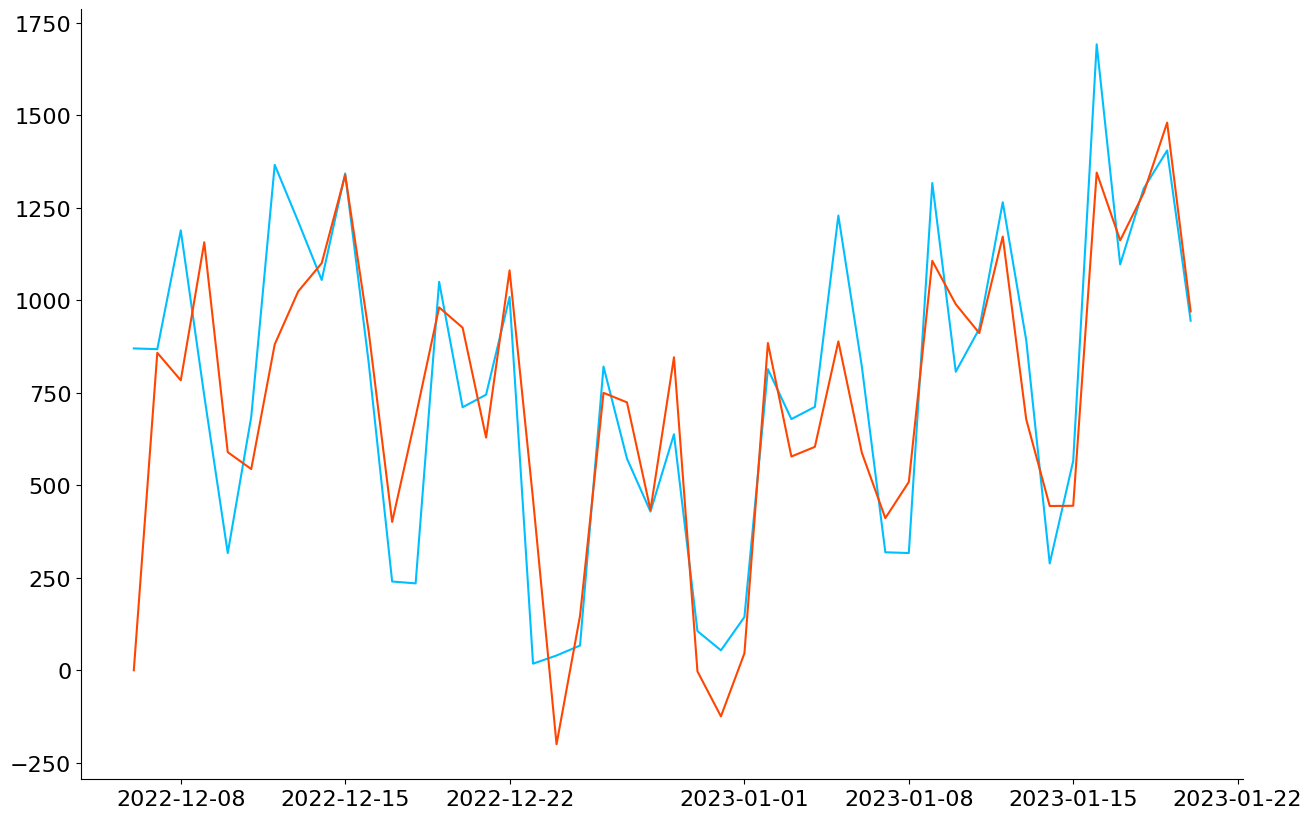

In [10]:
fig, ax = plt.subplots(figsize = (15, 10))
actual = ax.plot(df.Vendas, color = "deepskyblue")
pred = ax.plot(model.predict(typ = "levels"), color = "orangered")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)
 
plt.show()

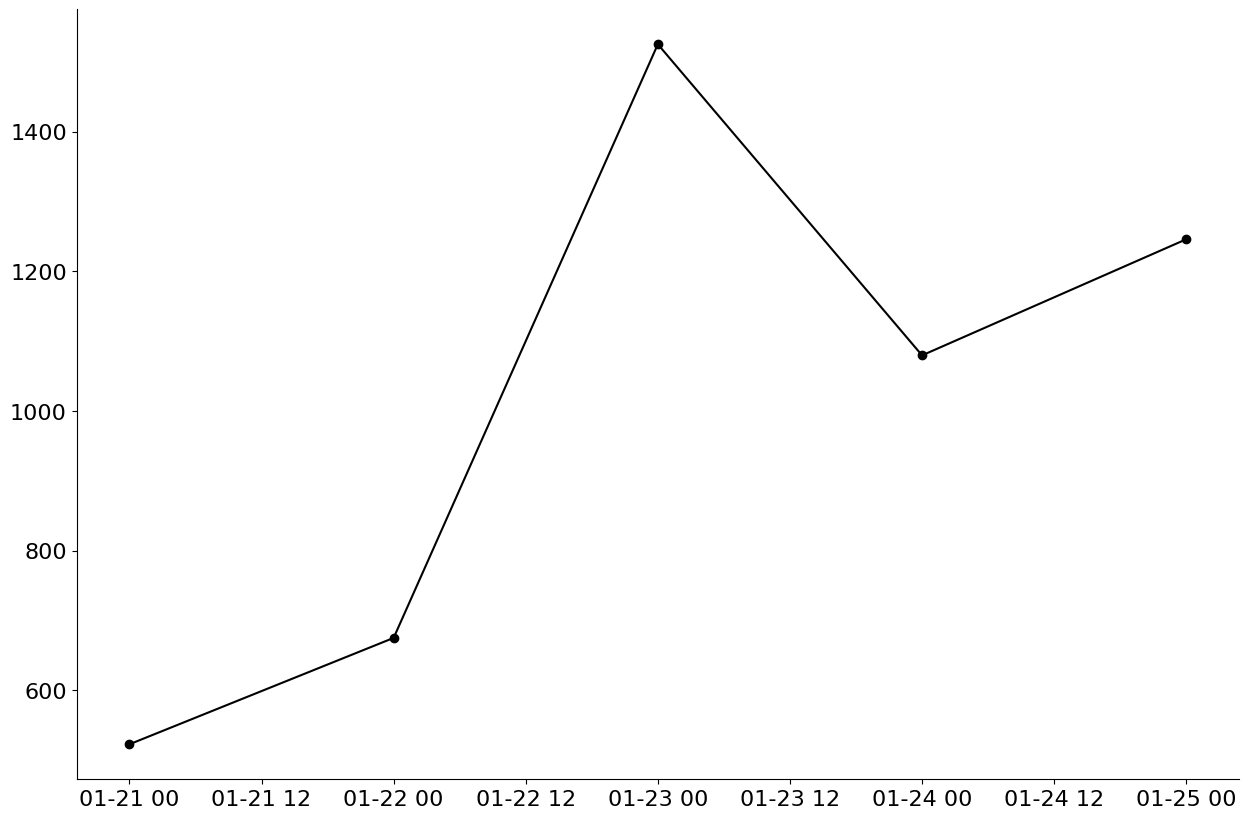

In [11]:
pred_steps = 5
pred_data = model.forecast(steps = pred_steps)


plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(pred_data, color = "black", marker = "o")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize = 16)


plt.show()
